### Clase 03 - Análisis Univariados
#### Realizar análisis de las variables de un dataset individualmente
- Histogramas
- Boxplots
- Pie Chart
- Creación e invocación de funciones en Python


#### Librería Matplotlib
La librería <a href="https://matplotlib.org/">matplotlib.org</a> es una de las librerías de Python más usada para visualizar 
datos a analizar.
Cuando trabajamos en un notebook debemos agregar la línea
<code>%matplotlib inline</code>

In [1]:
#Además de pandas, importamos matplotlib con prefijo plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Una forma de ver cómo se distribuyen los valores de una variable y su frecuencias es el histograma.<br><br>
Supongamos que tenemos las notas de un curso(cada nota corresponde a un examen).<br>
Creamos el histograma de las notas usando la función <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html">hist</a> de __matplotlib__. Se crean intervalos de los valores de las notas en el eje x y en el eje y se ubican las cantidad de valores que caen en ese intervalo.

Para ejecutar el histograma:
<code>plt.hist(...)</code>

Cantidad de notas:  15


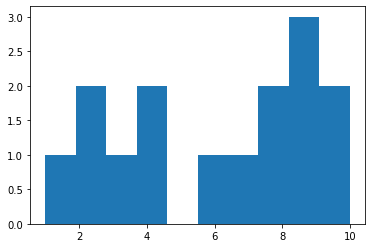

In [2]:
notas=[9,10,10,8,2,1,4,4,6,8,7,9,3,2,9] 
print('Cantidad de notas: ',len(notas))
plt.hist(notas)#<-- 
plt.show()

Vamos a mejorar el histograma. \\
* Como no se nota bien el borde podemos marcarlo con el parámetro __edgecolor='black'__<br>
* Para relacionar mejor el __eje y__ ponemos un grid en el fondo: __plt.grid(True)__ o __plt.grid(axis='x')__ o __plt.grid(axis='y')__.<br>
Con __plt.xticks()__ ponemos los valores del eje x.<br>
Para eso creamos __valores_nota__ (con los valores posibles de las notas), utilizando la función __range__ de Python.

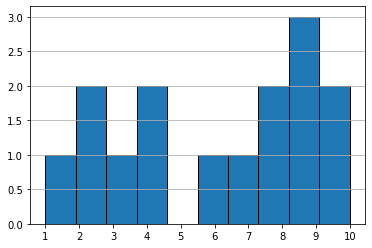

In [6]:
valores_notas=range(1,11)
plt.hist(notas,edgecolor='black')
plt.grid(axis='y')
plt.xticks(valores_notas)
plt.show()

Queremos crear 3 intervalos para ver la cantidad de desaprobados (<4), aprobados (entre 4 y 7), excelente(entre 8 y 10)
para eso se usa el parámentro __bins=__ que permite crear intervalos específicos. Le pasamos como parámetro una lista de intervalos cerrado-abierto.


Los intervalos serían: [1,4), [4,8),[8,10)


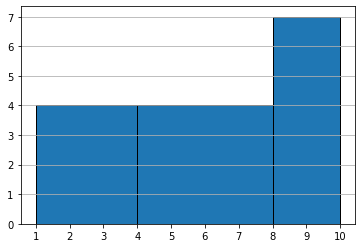

In [7]:
plt.grid(axis='y')
plt.xticks(valores_notas)
plt.hist(notas,edgecolor='black',bins=[1,4,8,10])
#-->bins que cumplan con la consigna plt.hist(notas,edgecolor='black',bins=)
plt.show()

Ponemos un título al histograma <br>
Podemos usar diferentes métodos de creación de los intervalos. __Sturges__ usa ${1+log_{2}(n)}$ donde n es la cantidad de valores.<br>
Mostramos las etiquetas con legend

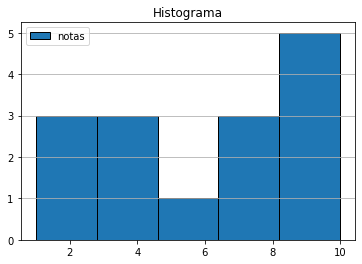

In [8]:
plt.grid(axis='y')
#Ponemos un título al histograma
plt.title('Histograma')
#Podemos usar diferentes métodos de creación de los intervalos. Sturges usa [1+log2n] donde n es la cantidad de valores
plt.hist(notas,edgecolor='black',bins='sturges',label='notas')
#Mostramos las etiquetas
plt.legend()
plt.show()

Ponemos el nombre del __eje x__ con __plt.xlabel__ y del __eje y__ con __plt.ylabel__<br>
Usamos el parámetro __rwidth__ con valor 0.7 para separar un poco las barras

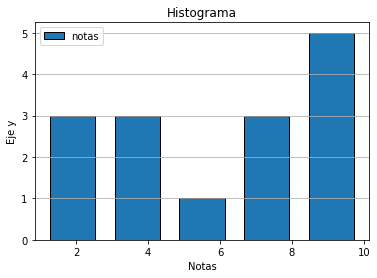

In [9]:
plt.grid(axis='y')
plt.title('Histograma')
plt.xlabel('Notas')#<--xlabel
plt.ylabel('Eje y')
plt.hist(notas,edgecolor='black',bins='sturges',label='notas',rwidth=0.7)
plt.legend()
plt.show()

Si queremos que los intervalos acumulen (es decir que cuenten sus valores más los anteriores),
usamos __cumulative=True__

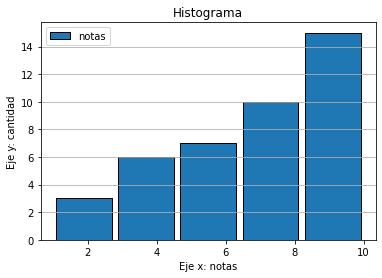

In [10]:
#<--todo lo anterior más histograma acumulativo
plt.grid(axis='y')
plt.title('Histograma')
plt.xlabel('Eje x: notas')#<--xlabel
plt.ylabel('Eje y: cantidad')#<--ylabel
plt.hist(notas,edgecolor='black',bins='sturges',label='notas',rwidth=0.9, cumulative=True )
plt.legend()
plt.show()

### Boxplot
El <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.boxplot.html">boxplot</a> es otro gráfico que resume el comportamiento de las variables. La caja tiene su límite superior en el quartil 0,75. El límite inferior está en el quartil 0,25 y en medio se encuentra la mediana (quartil 0,5).<br>
El $espacioInter quartil$ es el $q3-q1$.<br>
El extremo superior es el mayor valor menor que el quartil $0,75 + 1,5 * espacioIntercuartil$<br>
El extremo inferior es el mínimo valor mayor el quartil $0,25 - 1,5 * espacioIntercuartil$<br>

In [12]:
notas.sort()
print(notas)

[1, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 9, 9, 10, 10]


In [13]:
9+1.5*(9-3.5)

17.25

[1, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 9, 9, 10, 10]
Boxplot


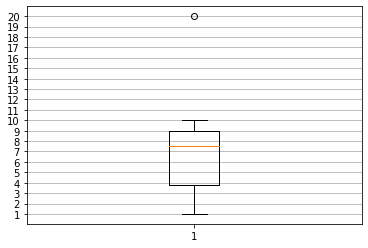

In [53]:
print(notas)
plt.boxplot(notas+[20])
plt.yticks(range(1,21))
plt.grid(axis='y')
print("Boxplot")

### Iris
Cargamos el dataset __iris.csv__ para graficar y poder analizar sus variables individualmente

In [16]:
#Cargamos iris c
iris=pd.read_csv(r'iris.csv',sep=';')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
#Observamos los valores de las variables con describe() de Pandas.
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
#Podemos separar el análisis de las vbles. categóricas
iris['Species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [19]:
#Otra forma
iris.describe(include='object')

,Species
count,150
unique,3
top,setosa
freq,50


Para mostrar la distribución de las especies dentro de nuestro dataset podemos usar el __Pie Chart__.
En matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html">pie</a> requiere que indiquemos la cantidad de valores por categoría (¿Podríamos obtener esas cantidades dinámicamente?). <br>
Además tenemos que indicar el parámetro __colors__ y el parámetro __labels__. <br>
Otros parámetros: explode, autopct, shadow

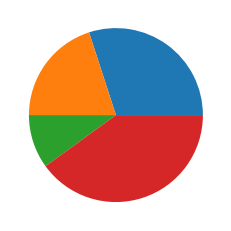

In [20]:
x=[30,20,10,40]
plt.pie(x)
plt.show()

In [21]:
iris.groupby(['Species']).size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [23]:
d=dict(iris.groupby(['Species']).size())
d.values()

dict_values([50, 50, 50])

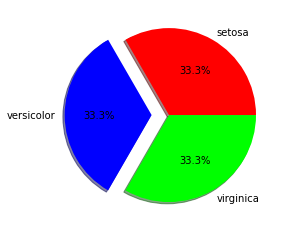

In [25]:
d=dict(iris.groupby(['Species']).size())
x=d.values()
l=d.keys()
colors = ['red', 'blue', 'lime']
#ex=[0,0,0]
ex=[0,0.2,0]
plt.pie(x,colors=colors,labels=l,autopct='%1.1f%%',explode=ex,shadow=True)
plt.show()

### Ejercicio
Hacer el histograma de Sepal.Width con color de barras rojo, espaciadas en 0.7, bins de sturges.

No handles with labels found to put in legend.


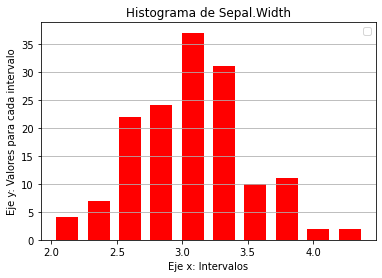

In [27]:
#Hacemos el histograma de Sepal.Width
#Cambiamos el color de las barras: color. Espaciamos las barras: rwidth
#Ponemos grid en el fondo

plt.title('Histograma de Sepal.Width')
plt.xlabel('Eje x: Intervalos')
plt.ylabel('Eje y: Valores para cada intervalo')
plt.grid(axis='y') 
plt.yscale('linear')
plt.hist(iris['Sepal.Width'],color='r',rwidth=0.7) #<---
plt.legend()
plt.show()

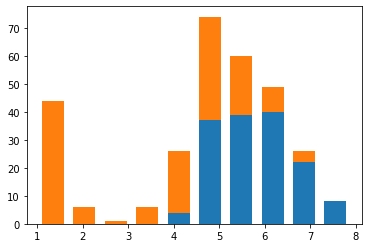

In [28]:
#Ponemos más de una variable y las apilamos. stacked=True
plt.hist([iris['Sepal.Length'],iris['Petal.Length']],rwidth=0.7,stacked=True)

plt.show()

Mostramos cada variable en su propio histograma. Para ello, declaramos dos figuras en un espacio tipo grilla, de 1 fila por 2 columnas.

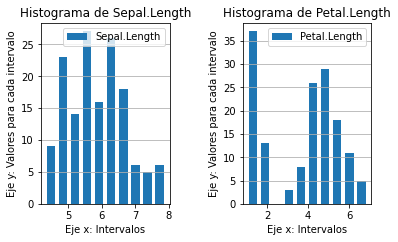

In [31]:
#Primer histograma
plt.subplot(1,2,1)
plt.hist(iris['Sepal.Length'],rwidth=0.7, label='Sepal.Length')
plt.title('Histograma de Sepal.Length')
plt.xlabel('Eje x: Intervalos')
plt.ylabel('Eje y: Valores para cada intervalo')
plt.grid(axis='y') 
plt.yscale('linear')
plt.legend()
#Segundo histograma
plt.subplot(1,2,2)
plt.hist(iris['Petal.Length'],rwidth=0.7, label='Petal.Length')
plt.title('Histograma de Petal.Length')
plt.xlabel('Eje x: Intervalos')
plt.ylabel('Eje y: Valores para cada intervalo')
plt.grid(axis='y') 
plt.yscale('linear')
plt.legend()
#<--posición del segundo dibujo
#<--llamamos a hist
#<--Colocamos el título
#<--ponemos la etiqueta del eje x
#<--ponemos la etiqueta del eje y
#<--que aparezcan los ticks de y
#<--damos visibilidad a la leyenda

plt.tight_layout(3)

Estamos repitiendo las mismas líneas de código. Para evitar esto podemos modularizar el código en una __función__.<br>
En Python las funciones se declaran usando la palabra reservada __def__ luego el __nombre__ de la función, luego paréntesis con el listado de los parámetros, y por último __dos puntos :__<br>
El código dentro de la función necesita un tab respecto del márgen.<br>
Opcionalmente podemos devolver uno o más valores con la clausula __return__

In [36]:
def hola(a,b=None):
    return a

Para invocar las funciones simplemente escribimos su nombre junto con los parámetros actuales.

In [39]:
hola('nada')

'nada'

In [40]:
#Analizamos el código que se repite para modularizar
#Creamos una función con ese código
#La función se declara con def. Tiene el nombre "graficar" y le pasamos parámetros
#fila: es la cantidad de filas de la figura
#col:es la cantidad de columnas de la figura
#pos:la posición en la grilla anterior en la que va ubicada nuestro plot
#datos:la variable con sus datos 
#nombre:el nombre de la variable
#color:color de las barras. optativo
def graficar(fila,col,pos,datos,nombre,color=None):
    plt.subplot(fila,col,pos)
    plt.hist(datos,rwidth=0.7,color=color)
    plt.title(nombre)
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.grid(axis='y') 
    plt.yscale('linear')



In [41]:
#observar cómo obtener los nombres de las variables en Pandas
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

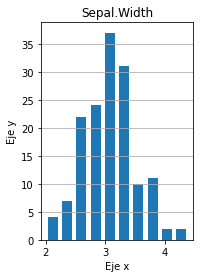

In [42]:
graficar(1,2,1,iris[iris.columns[1]],iris.columns[1])

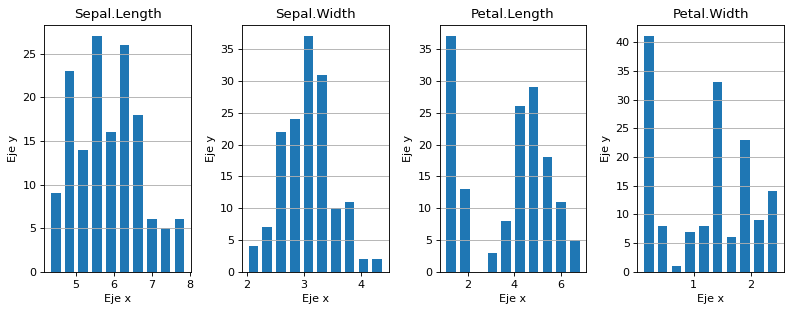

In [43]:
#Llamamos la función graficar cuatro veces con cada columna numérica del dataset y ponemos un título único
fig=plt.figure(figsize=(10, 4), dpi= 80)

for i in range(0,4):#<- crear un ciclo que llame a la función graficar 
    graficar(1,4,i+1,iris[iris.columns[i]],iris.columns[i])#<-llamar a la función
plt.tight_layout()


Vamos a darle un color diferente a cada uno. Creamos una lista "colores" con cuatro valores de colores.

Si es necesario, podemos ampliar el espacio de dibujo con:
<code>fig=plt.figure(figsize=(10, 4), dpi= 80)</code>

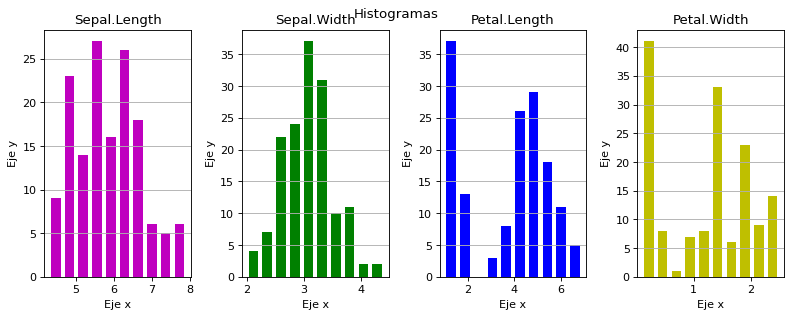

In [44]:
colores=['m','g','b','y']
fig=plt.figure(figsize=(10, 4), dpi= 80)
for i in range(0,4):
  graficar(1,4,i+1,iris[iris.columns[i]],iris.columns[i],colores[i])
    #<--Llamar a la función creada
    
plt.tight_layout()
plt.suptitle('Histogramas')
plt.show()

In [45]:
#Crear una función que dibuje cada boxplot que reciba como parámetro la cantidad de filas, columnas
#la posición, los datos y el color
def graficabp(f,c,pos,datos,cartel,col=None):
    plt.subplot(f,c,pos)
    plt.grid(True)
    plt.title(cartel)
    plt.boxplot(datos)

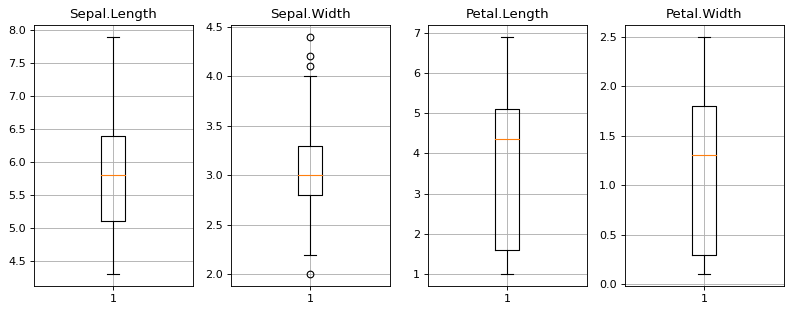

In [47]:
fig=plt.figure(figsize=(10, 4), dpi= 80)
for i in range(0,4):
    graficabp(1,4,i+1,iris[iris.columns[i]],iris.columns[i])
plt.tight_layout()

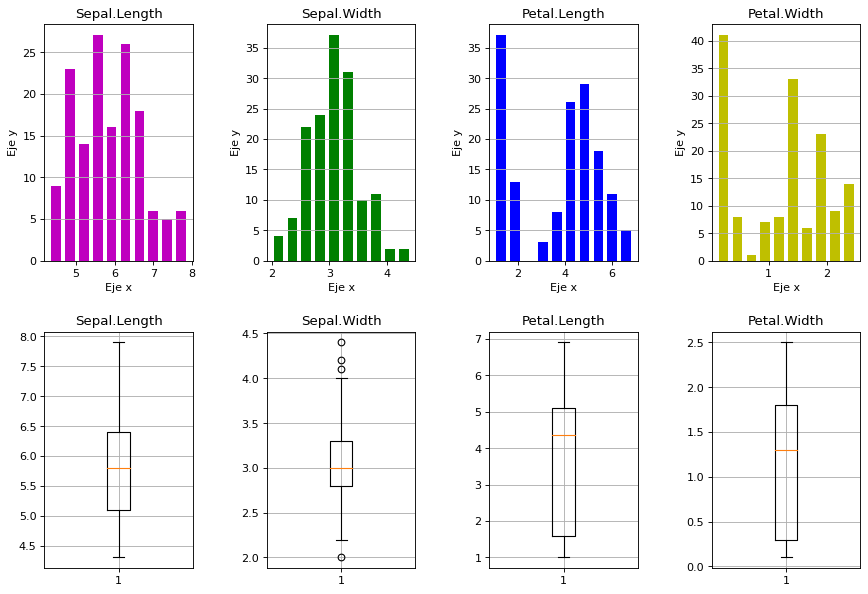

In [48]:
#Graficamos los histogramas y los boxplots de las cuatro variables numéricas de iris
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9,wspace=0.5,hspace=0.3)
for i in range(0,4):
    graficar(2,4,i+1,iris[iris.columns[i]],iris.columns[i],colores[i])
    graficabp(2,4,i+5,iris[iris.columns[i]],iris.columns[i])
#plt.tight_layout()


Boxplot


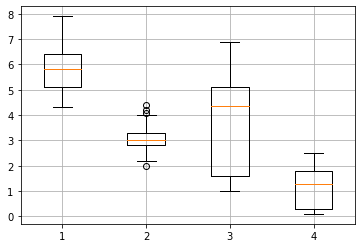

In [49]:
#Crear los boxplots de las variables numéricas de iris todos en una misma figura
plt.grid(True)
#plt.yticks([])
plt.boxplot([iris['Sepal.Length'],iris['Sepal.Width'],iris['Petal.Length'],iris['Petal.Width']])
print("Boxplot")